In [12]:
import pandas as pd
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df = pd.DataFrame({
    'Weight Lifted': [37.5, 51.5, 61.3, 61.3, 63.6, 66.1, 70, 92.7, 90.5, 90.5],
    'Shot Put Distance': [6.4, 10.2, 12.4, 13, 13.2, 13, 12.7, 13.9, 15.5, 15.8]
})

x = df['Weight Lifted']
y = df['Shot Put Distance']

df

,Weight Lifted,Shot Put Distance
0,37.5,6.4
1,51.5,10.2
2,61.3,12.4
3,61.3,13.0
4,63.6,13.2
5,66.1,13.0
6,70.0,12.7
7,92.7,13.9
8,90.5,15.5
9,90.5,15.8


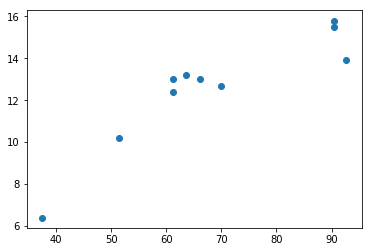

In [29]:
plt.scatter(x, y)

slope: 0.133863384297 intercept: 3.44035817564


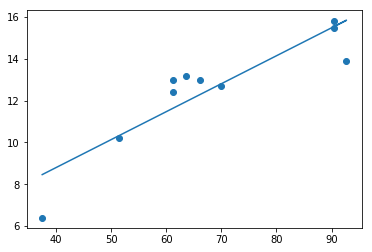

In [35]:
slope, intercept, _, _, _ = stats.linregress(x, y)
print("slope:", slope, "intercept:", intercept)

plt.scatter(x, y)
regression_line = [slope * i + intercept for i in x]
plt.plot(x, regression_line)

slope: 0.133863260103 intercept: 3.44036667318


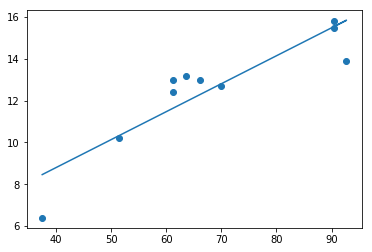

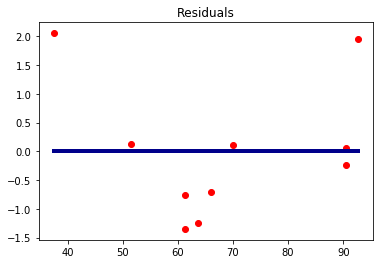

In [64]:
def shotput_linear_mse(weights):
    any_slope, any_intercept = weights
    fitted = any_slope*x + any_intercept
    return np.mean((y - fitted) ** 2)

slope, intercept = minimize(shotput_linear_mse, [0,0]).x
print("slope:", slope, "intercept:", intercept)

plt.scatter(x, y)
regression_line = [slope * i + intercept for i in x]
plt.plot(x, regression_line)
plt.show()

residuals = regression_line - y 
plt.scatter(x, residuals, color='r')
plt.plot([min(x), max(x)], [0,0], color='darkblue', lw=4)
plt.title('Residuals');

a: -0.00304790447788 b: 0.551312000735 c: -9.95745951844


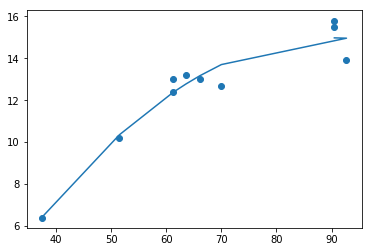

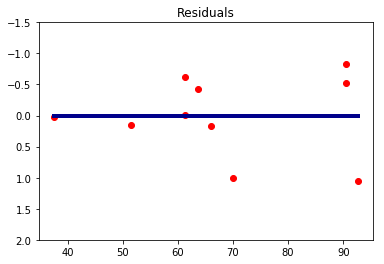

In [68]:
def shotput_quadratic_mse(weights):
    a, b, c = weights
    fitted = a*(x**2) + b*x + c
    return np.mean((y - fitted) ** 2)

a, b, c = minimize(shotput_quadratic_mse, [0,0,0]).x
print("a:", a, "b:", b, "c:", c)

plt.scatter(x, y)
regression_line = [a*(i**2) + b*i + c for i in x]
plt.plot(x, regression_line)
plt.show()

residuals = regression_line - y 
plt.scatter(x, residuals, color='r')
plt.plot([min(x), max(x)], [0,0], color='darkblue', lw=4)
plt.ylim(2, -1.5)
plt.title('Residuals');